# Исследование данных о рынке видеоигр

### Описание проекта: 

отработать принцип работы с данными - исторические сведения о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Заказчик: 

интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры.

### Цель: 

#### Открыть файл с данными и изучить общую информацию

#### Подготовить данные

* Заменить названия столбцов (привести к нижнему регистру);
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
* Обработать пропуски при необходимости:
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
* Описать причины, которые могли привести к пропускам;
* Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

#### Провести исследовательский анализ данных:
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Составить портрет пользователя каждого региона

* Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Проверить гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение alpha.

Пояснить:

Как сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

#### Итоговый вывод

## Открыть файл с данными и изучить общую информацию

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st # импортируем библиотеки

In [6]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') # открываем файл

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Имеется 10 признаков с данными. Только в 5 отсутствуют пропуски. Явно искажены типы признаков. Их названия не приведены к нижнему регистру. 

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

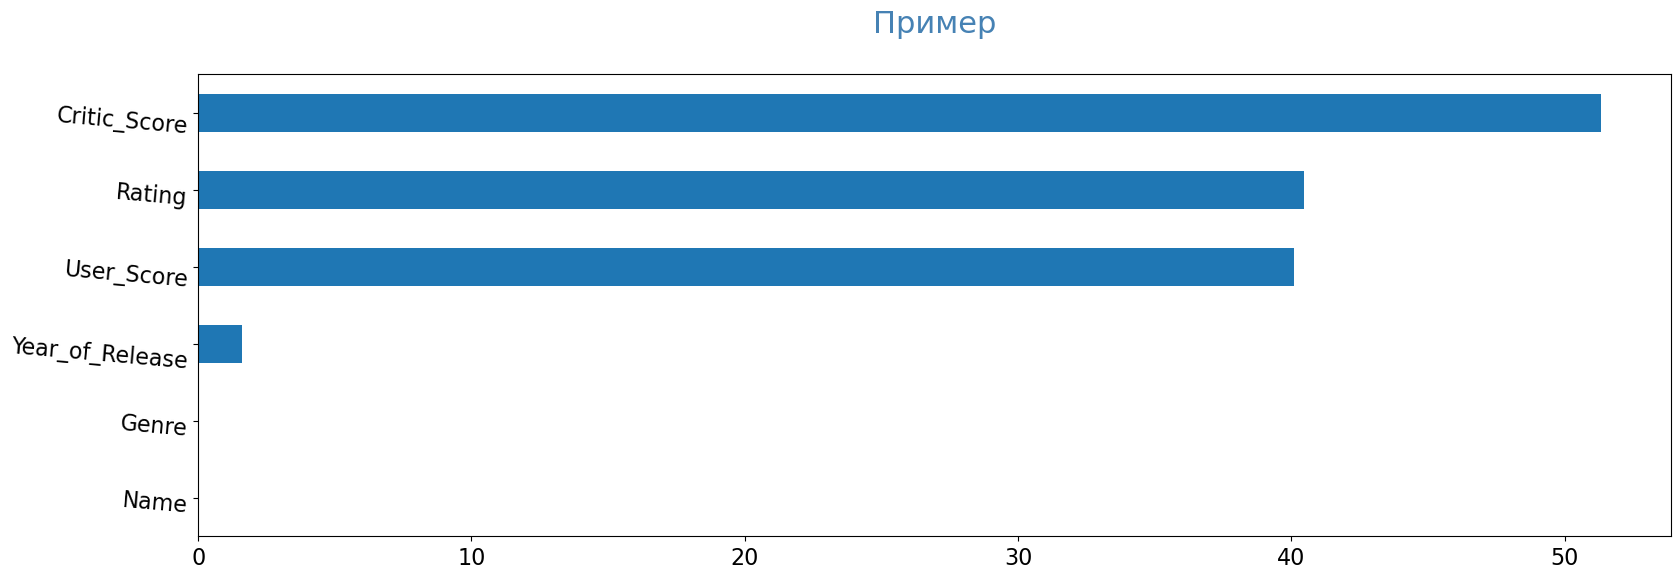

In [10]:
pass_value_barh(data)

## Подготовить данные

In [11]:
data.columns = map(str.lower, data.columns) # приводим названия признаков к нижнему регистру

In [12]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В 'year_of_release' есть пропущенные значения, и тип не соответствует данным (необходим int)

In [13]:
(len(data[data['year_of_release'].isna() == True])/len(data))*100

1.609332934489979

Количество пропусков составляет 1.6%, соответственно, от данных можно просто избавиться, на анализ они не повлияют

In [14]:
data = data[data['year_of_release'].isna() == False]

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int') #привели тип данных к искомому

In [16]:
#data.info()

In [17]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В признаке тоже целесообразно изменить тип данных, но пропусков явно больше, чем с годами релиза

In [18]:
(len(data[data['critic_score'].isna() == True])/len(data))*100

51.45932141554177

Пропусков больше половины, удалить их не представляется возможным. В таком случае данные лучшего всего оставить как есть, без изменений. 

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
(len(data[data['user_score'].isna() == True])/len(data))*100

40.1739024686854

40% пропусков, оставляем их как есть. При этом в некоторых строках есть значение tbd - это может означать to be determined, например. По сути, это означает отсутствие оценки, и от этой аббревиатуры можно избавиться.

In [21]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') #избавляемся от tbd

In [22]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [23]:
#data.info()

Типы данных изменены где это возможно, приступаем к обработке пропусков в оставшихся столбцах

In [24]:
data[(data['name'].isna() == True) | (data['genre'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В признаках 'name' и 'genre' есть по два совпадающих пропуска, можем безболезненно удалить эти данные

In [25]:
data = data[(data['name'].isna() == False) | (data['genre'].isna() == False)]

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Вероятно, пропуски в 'rating' также означают отсутствие оценки (рейтинга). Можем заменить их на другое нечисловое значение

In [27]:
data['rating'] = data['rating'].fillna('no rating')

In [28]:
#data.info()

Таким образом, избавились от пропусков двумя способами: удалением строк (там, где это не помешает дальнейшему анализу) и заменой пропущенных значений на 'no_rating'. В двух признаках пропуски остались нетронутыми, т.к. впоследствии они могут нам понадобиться.

In [30]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# подсчитываем суммарные продажи

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [27]:
data.duplicated().sum()

0

In [28]:
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [29]:
data[data['name']=='Madden NFL 13'] # строка 16230 лишняя

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [30]:
data.drop(labels = [16230],axis = 0,inplace=True)

Таким образом завершили предобработку данных - привели названия признаков к нижнему регистру, изменили их типы, по возможности избавились от пропусков и создали новый признак с суммарными продажами по всем регионам.

##  Провести исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [32]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

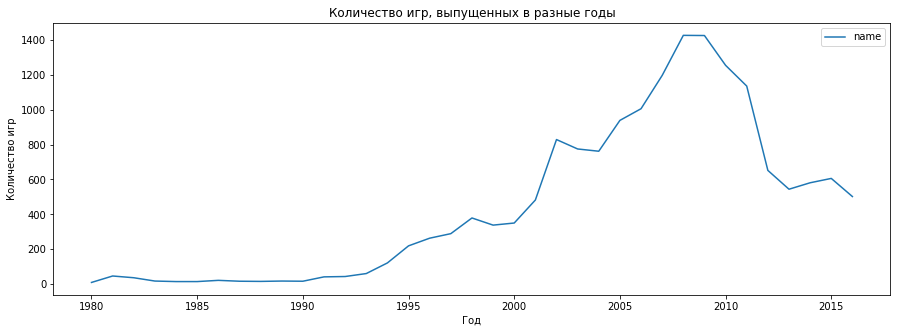

In [33]:
data.pivot_table(index= (data.query('year_of_release != 0')['year_of_release']),
               values= 'name',aggfunc='count').plot(figsize=(15, 5))

plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')

plt.show()

В 1980-е выпускалось мало игр, соответственно, эти сведения нам мало пригодятся. Рост начинается с 1994 года, данные по этим играм представляются наиболее важными. 

### Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [34]:
sales_per_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
sales_per_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


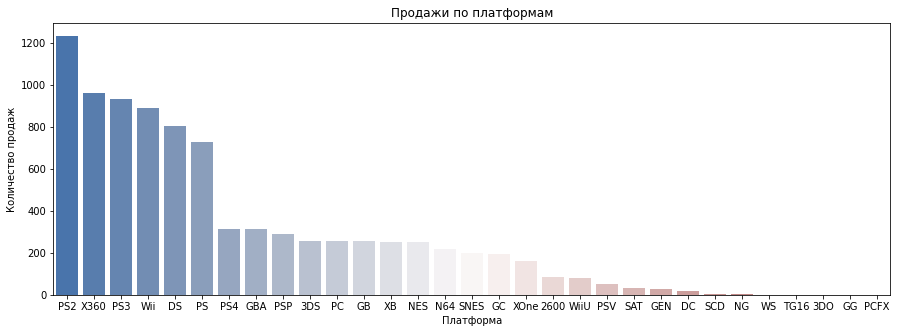

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x = sales_per_platform['platform'], y = sales_per_platform['total_sales'], palette="vlag")
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

На общем фоне наиболее явно выделяются 6 платформ

In [36]:
sales_per_platform_top = data[
    (data['platform'] == 'PS2') | 
    (data['platform'] == 'X360')| 
    (data['platform'] == 'PS3') | 
    (data['platform'] == 'Wii') | 
    (data['platform'] == 'DS')  | 
    (data['platform'] == 'PS')
]
# создаем датафрейм, но уже с самыми популярными 6 платформами

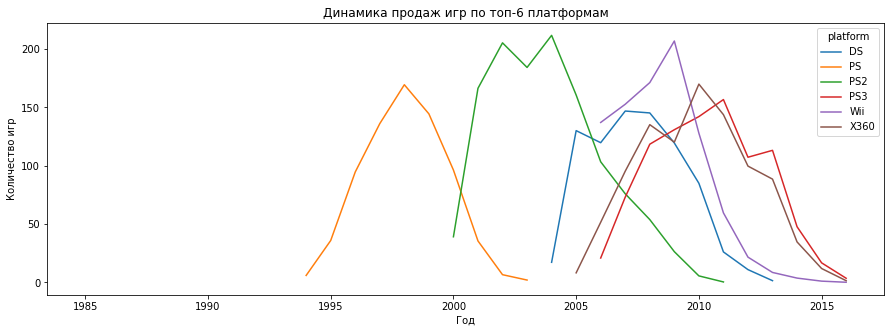

In [37]:
sales_per_platform_top.pivot_table(index= (sales_per_platform_top.query('year_of_release != 0')['year_of_release']),
               values= 'total_sales', columns = 'platform', aggfunc='sum').plot(figsize=(15, 5))

plt.title('Динамика продаж игр по топ-6 платформам')
plt.xlabel('Год')
plt.ylabel('Количество игр')

plt.show()

В среднем, игры по самым популярным платформам продаются в течение 10 лет. Пик составляет 3-4 года. Примечательно, что пик большинства популярных платформ пришелся на 2000-е, при этом они самые высокие значения по годам не повторяются. 

In [38]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no rating,0.02


Консоль DS вышла в 2004 г., данные не соответствуют действительности

In [39]:
data.drop(labels = [15957],axis = 0,inplace=True)

### Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Пик поплуярности игр пришелся на конец 2000-х, одновременно с ростом продаж на Wii, после чего начался планомерный спад. будет логично предположить, что в 2017 году ситуация на рынке продолжит стагнировать. Будет логичным взять данные за последние 3 года, т.е. с 2014 г., когда были выпущены новые версии консолей (PS4 и Xbox One)

### Не учитывать в работе данные за предыдущие годы.

In [40]:
data = data[data['year_of_release'] >= 2014]

### Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

In [41]:
sales_per_platform_actual = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
sales_per_platform_actual

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


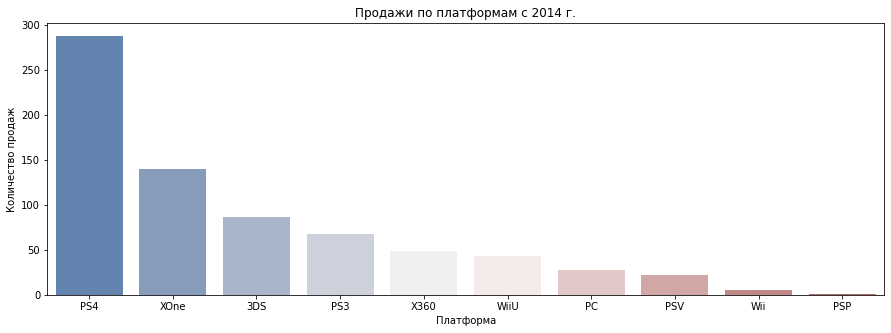

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x = sales_per_platform_actual['platform'], y = sales_per_platform_actual['total_sales'], palette="vlag")
plt.title('Продажи по платформам с 2014 г.')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

С 2014 г. на рынке доминировали игры для PS4. Для полноты картины также можем взять игры XOne и 3DS, а также PC в качестве платформы-"долгожительницы", которая находится на рынке более 30 лет - остальные платформы либо значительно отстают от лидеров, либо являются устаревшими

In [43]:
sales_per_platform_top_actual = data[
    (data['platform'] == 'PS4') | 
    (data['platform'] == 'XOne')| 
    (data['platform'] == '3DS') |
    (data['platform'] == 'PC')
]

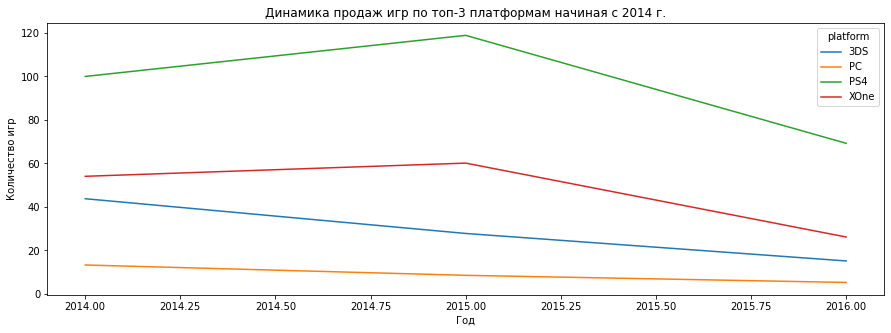

In [44]:
sales_per_platform_top_actual.pivot_table(index= (sales_per_platform_top_actual.query('year_of_release != 0')['year_of_release']),
               values= 'total_sales', columns = 'platform', aggfunc='sum').plot(figsize=(15, 5))

plt.title('Динамика продаж игр по топ-3 платформам начиная с 2014 г.')
plt.xlabel('Год')
plt.ylabel('Количество игр')

plt.show()

Пик продаж по трем платформам-консолям пришелся на 2015 г., после чего начался спад. ПК на протяжении всего периода крайне стабильны, при этом показатели из выборки самые низкие. Логично предположить, что и в 2017 г. спад по продажам продолжится

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.

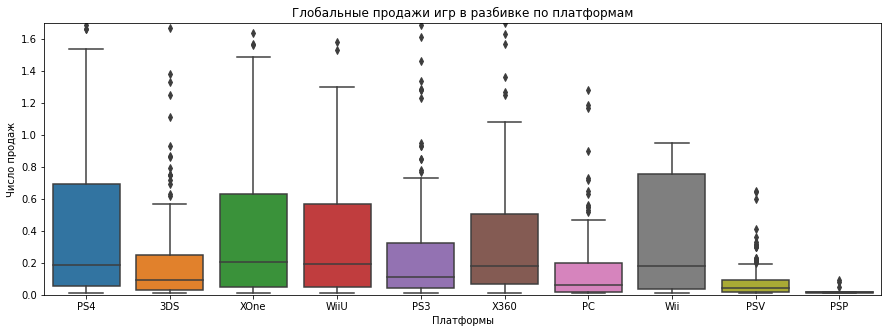

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(data = data , x = 'platform', y = 'total_sales')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Число продаж')
plt.ylim(0,1.7)
plt.show()

При рассмотрении графика ситуация немного иная - медианные значения схожи сразу у нескольких платформ (PS4, Xone, WiiU, X360 и Wii), при этом лидером по верхнему квартилю является Wii. При этом размах значений отличается в сторону бОльших значений. По верхней границе с отрывом лидирует PS4. 

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.

За основу возьмем PS4. 

In [46]:
ps4 = data[data['platform'] == 'PS4']

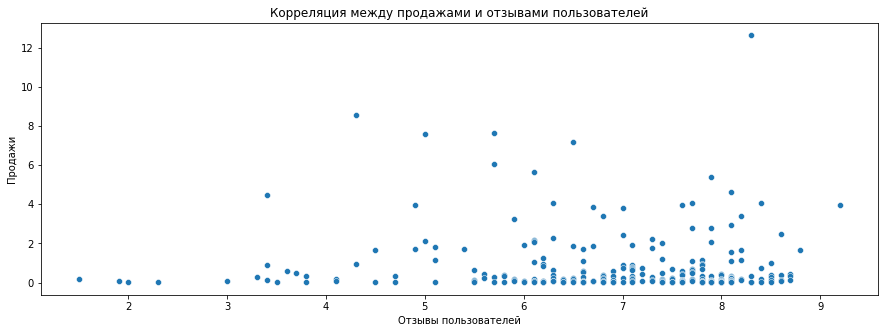

In [47]:
plt.figure(figsize=(15,5))

sns.scatterplot(data= ps4, x='user_score', y='total_sales')

plt.title('Корреляция между продажами и отзывами пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

In [48]:
ps4['user_score'].corr(ps4['total_sales'])

-0.040131589472697356

Корреляция между продажами и отзывами пользователей составляет всего -0.04, т.е. взаимосвязь отсутствует.

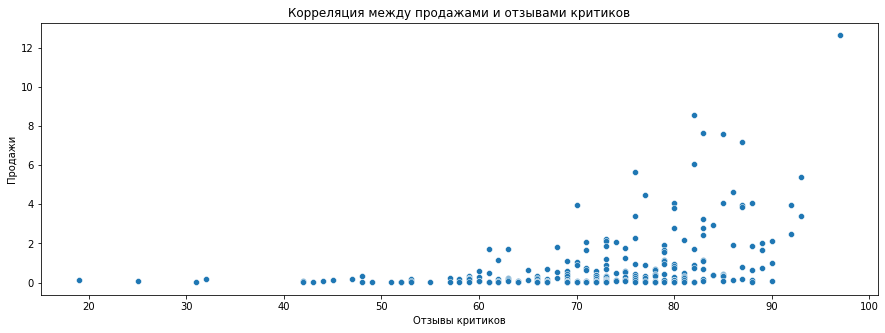

In [49]:
plt.figure(figsize=(15,5))

sns.scatterplot(data= ps4, x='critic_score', y='total_sales')

plt.title('Корреляция между продажами и отзывами критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

In [50]:
ps4['critic_score'].corr(ps4['total_sales'])

0.40266141068104083

С отзывами критиков ситуация иная - корреляция между ними и продажами есть. Таким образом, на продажи влияют отзывы критиков, оценки пользователей особого значения не играют.

### Соотнести выводы с продажами игр на других платформах

PS4
critic_score
0.40266141068104083
user_score
-0.040131589472697356


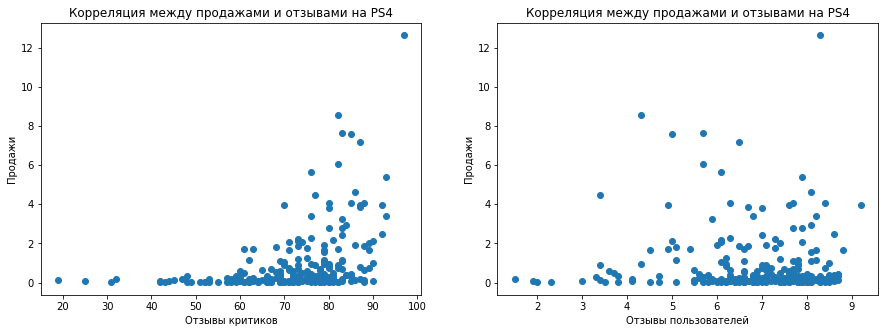

3DS
critic_score
0.31411749286905105
user_score
0.2151932718527028


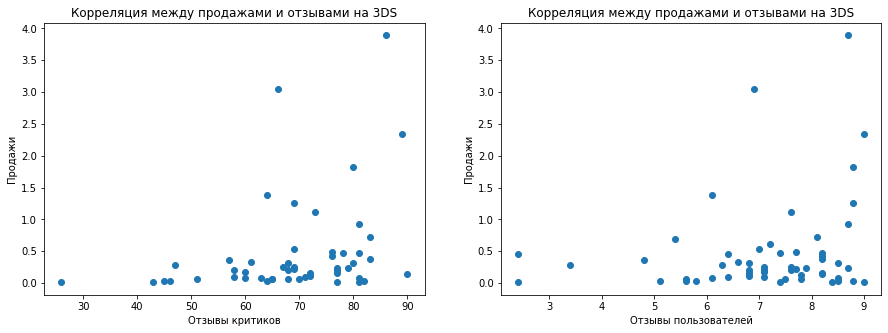

XOne
critic_score
0.42867694370333226
user_score
-0.0703839280647581


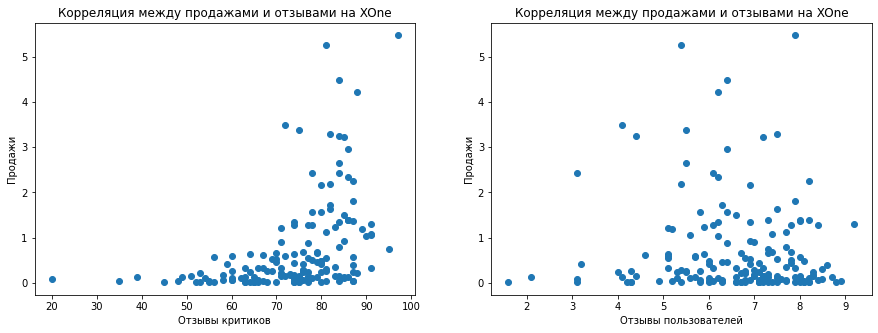

WiiU
critic_score
0.370201412480884
user_score
0.4079264579217078


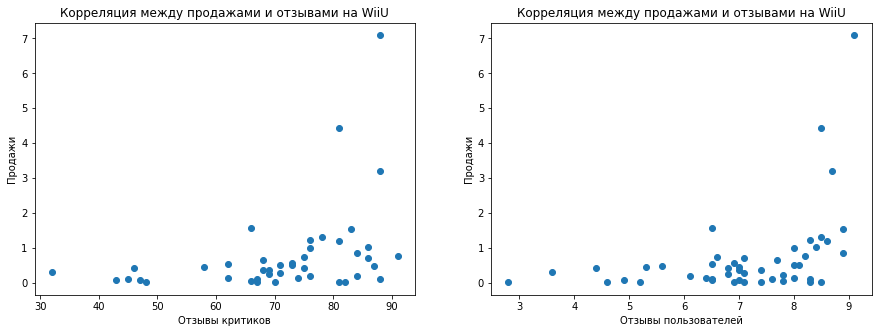

PS3
critic_score
0.44657460493190704
user_score
-0.16676141347662116


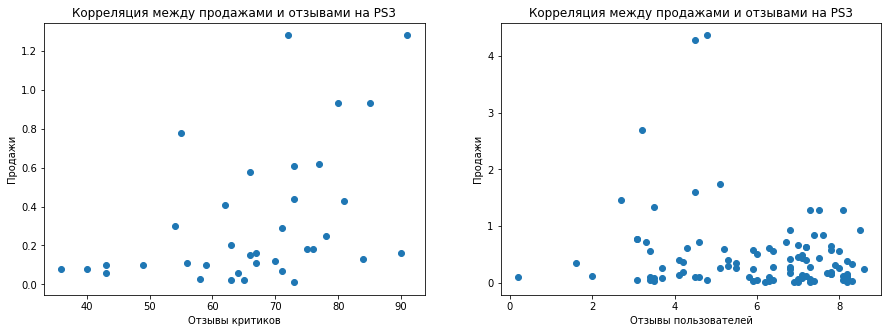

X360
critic_score
0.5257228356581523
user_score
-0.138444570945665


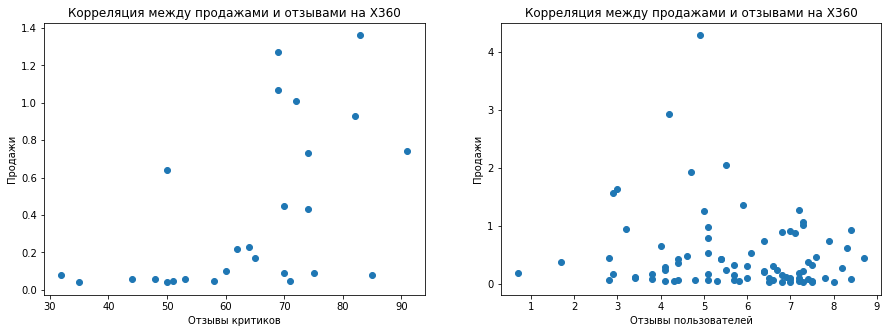

PC
critic_score
0.17463413769350036
user_score
-0.07159665703472452


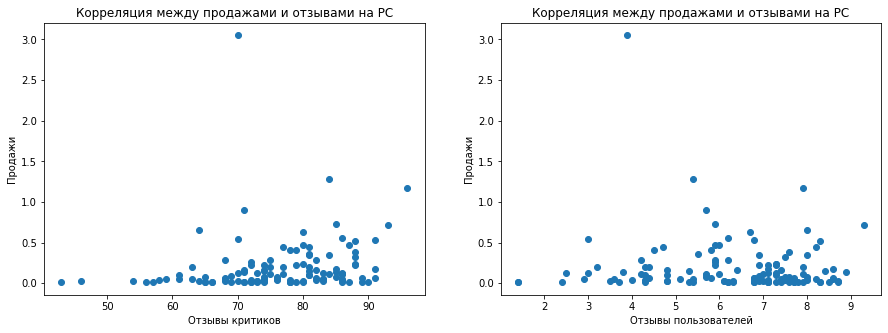

Wii
critic_score
nan
user_score
1.0


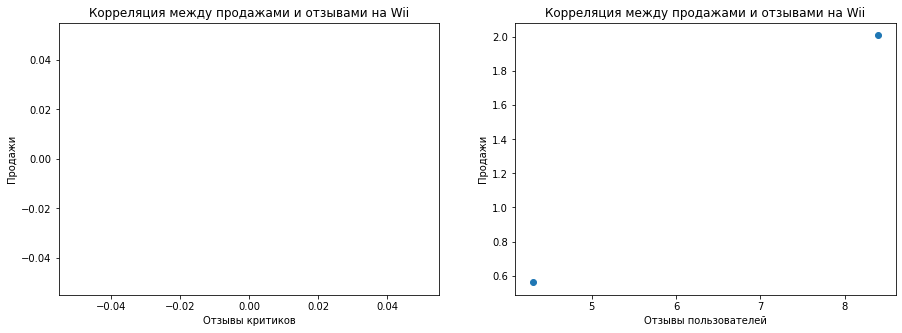

PSV
critic_score
0.04266490657009526
user_score
-0.16845504978064446


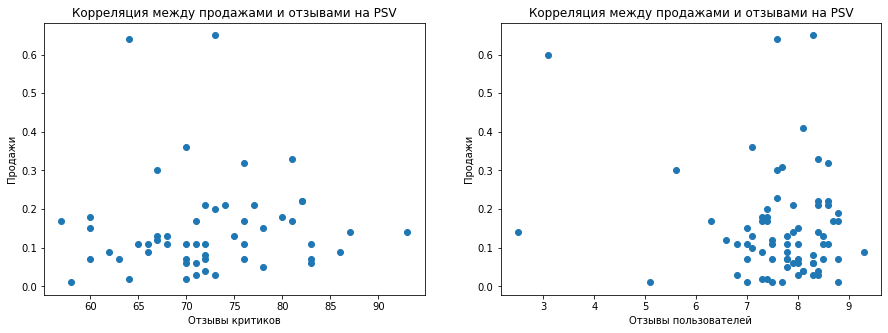

PSP
critic_score
nan
user_score
nan


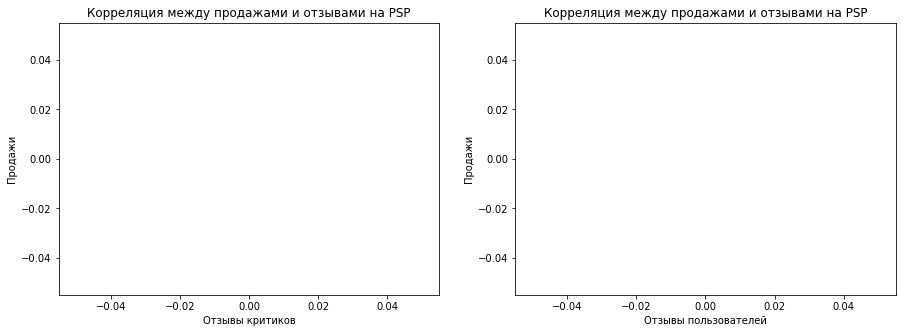

In [51]:
for i in data['platform'].unique():
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    ax[0].scatter(x='critic_score', y='total_sales', data= data[data['platform']==i])
    ax[0].set_title('Корреляция между продажами и отзывами на {}'.format(i))
    ax[0].set_xlabel('Отзывы критиков')
    ax[0].set_ylabel('Продажи')
    ax[1].scatter(x='user_score', y='total_sales', data= data[data['platform']==i])
    ax[1].set_title('Корреляция между продажами и отзывами на {}'.format(i))
    ax[1].set_xlabel('Отзывы пользователей')
    ax[1].set_ylabel('Продажи')
    
    print(i)
    print('critic_score')
    print(data.query('platform == @i')['total_sales'].corr(data.query('platform == @i')['critic_score']))
    print('user_score')
    print(data.query('platform == @i')['total_sales'].corr(data.query('platform == @i')['user_score']))
    plt.show()

По Wii и PSP отсутствуют данные для анализа. По остальным - пользовательские оценки не влияют на продажи (исключение - 3DS и WiiU, но по ним мало информации). По оценкам критиков и продажам взаимосвязь есть, но нельзя сказать, что она критична. Таким образом, можем сделать вывод, что покупатели скорее смотрят отзывы критиков, а не других пользователей. 

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [52]:
data.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

Больше всего игр в жанре Action, меньше всего - паззлов. 

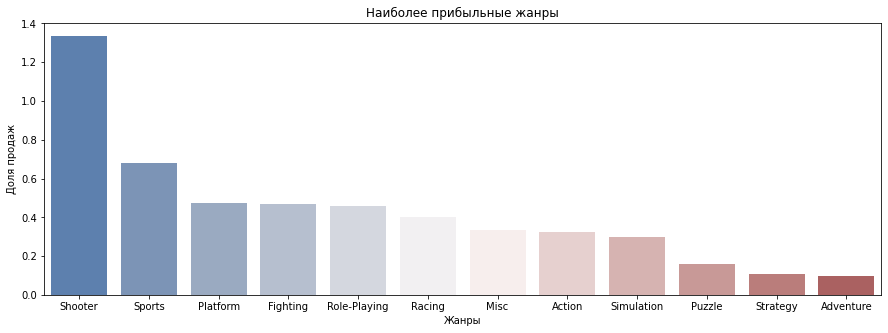

In [53]:
genres = data.pivot_table(index ='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).reset_index()

plt.figure(figsize=(15,5))

sns.barplot(x = genres['genre'], y = genres['total_sales'], palette="vlag")
plt.title('Наиболее прибыльные жанры')
plt.xlabel('Жанры')
plt.ylabel('Доля продаж')
plt.show()

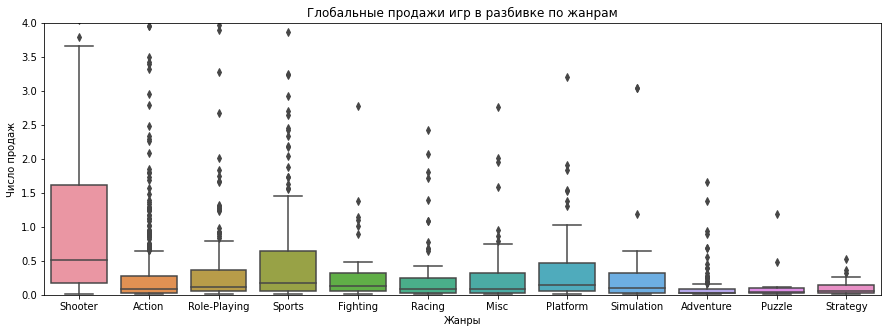

In [54]:
plt.figure(figsize=(15,5))

sns.boxplot(data = data, x='genre', y='total_sales')


plt.ylim([0,4])
plt.title('Глобальные продажи игр в разбивке по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Число продаж')
plt.show()

Лучше всего продаются шутеры, спортивные игры и платформеры. Action-игры, несмотря на свое количество, продаются плохо. На дне рейтинга - приключенческие игры, паззлы и стратегии

## Составить портрет пользователя каждого региона

### Определить для пользователя каждого региона (NA, EU, JP):
#### Самые популярные платформы (топ-5). Описать различия в долях продаж.

In [55]:
platforms_by_region = data.pivot_table(
    index = 'platform', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

platforms_by_region

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,130.04,15.02,98.61,288.15
1,XOne,46.25,0.32,81.27,140.36
2,3DS,16.12,44.24,22.64,86.68
3,PS3,25.54,11.22,22.05,68.18
4,X360,15.49,0.08,28.30,48.22
5,WiiU,13.15,7.31,19.36,42.98
6,PC,17.97,0.00,7.23,27.05
7,PSV,3.53,14.54,2.52,22.40
8,Wii,2.59,0.00,2.08,5.07
9,PSP,0.00,0.36,0.00,0.36


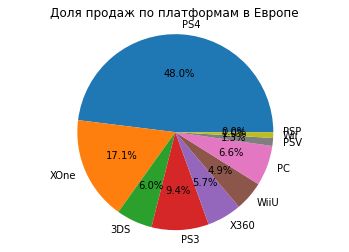

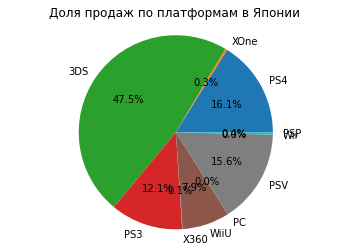

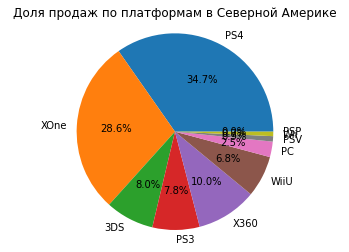

In [56]:
fig1, ax1 = plt.subplots()
ax1.pie(platforms_by_region['eu_sales'],labels = platforms_by_region['platform'],autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Доля продаж по платформам в Европе')

fig1, ax1 = plt.subplots()
ax1.pie(platforms_by_region['jp_sales'],labels = platforms_by_region['platform'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по платформам в Японии')

fig1, ax1 = plt.subplots()
ax1.pie(platforms_by_region['na_sales'],labels = platforms_by_region['platform'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по платформам в Северной Америке')

plt.show()

In [57]:
jp_platforms_by_region = data.pivot_table(
    index = 'platform', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

jp_top_platforms_by_region = jp_platforms_by_region.iloc[:5]

jp_bottom_platforms_by_region = pd.DataFrame({'jp_sales': [jp_platforms_by_region.iloc[5:]['jp_sales'].sum()]})

jp_top_platforms_by_region = jp_top_platforms_by_region.append(jp_bottom_platforms_by_region)

jp_top_platforms_by_region['platform'] = jp_top_platforms_by_region['platform'].fillna('Other')
jp_top_platforms_by_region

,platform,eu_sales,jp_sales,na_sales,total_sales
0,3DS,16.12,44.24,22.64,86.68
1,PS4,130.04,15.02,98.61,288.15
2,PSV,3.53,14.54,2.52,22.40
3,PS3,25.54,11.22,22.05,68.18
4,WiiU,13.15,7.31,19.36,42.98
0,Other,NaN,0.76,NaN,NaN


In [58]:
eu_platforms_by_region = data.pivot_table(
    index = 'platform', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

eu_top_platforms_by_region = eu_platforms_by_region.iloc[:5]

eu_bottom_platforms_by_region = pd.DataFrame({'eu_sales': [eu_platforms_by_region.iloc[5:]['eu_sales'].sum()]})
eu_top_platforms_by_region = eu_top_platforms_by_region.append(eu_bottom_platforms_by_region)
eu_top_platforms_by_region['platform'] = eu_top_platforms_by_region['platform'].fillna('Other')

eu_top_platforms_by_region

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,130.04,15.02,98.61,288.15
1,XOne,46.25,0.32,81.27,140.36
2,PS3,25.54,11.22,22.05,68.18
3,PC,17.97,0.00,7.23,27.05
4,3DS,16.12,44.24,22.64,86.68
0,Other,34.76,NaN,NaN,NaN


In [59]:
na_platforms_by_region = data.pivot_table(
    index = 'platform', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()

na_top_platforms_by_region = na_platforms_by_region.iloc[:5]

na_bottom_platforms_by_region = pd.DataFrame({'na_sales': [na_platforms_by_region.iloc[5:]['na_sales'].sum()]})

na_top_platforms_by_region = na_top_platforms_by_region.append(na_bottom_platforms_by_region)
na_top_platforms_by_region['platform'] = na_top_platforms_by_region['platform'].fillna('Other')

na_top_platforms_by_region

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,130.04,15.02,98.61,288.15
1,XOne,46.25,0.32,81.27,140.36
2,X360,15.49,0.08,28.30,48.22
3,3DS,16.12,44.24,22.64,86.68
4,PS3,25.54,11.22,22.05,68.18
0,Other,NaN,NaN,31.19,NaN


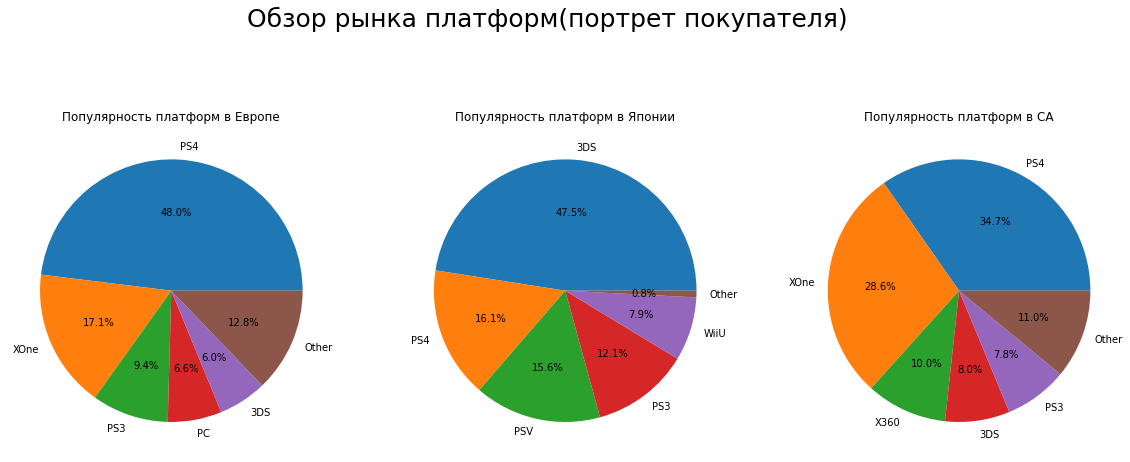

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.pie( eu_top_platforms_by_region['eu_sales'],labels = eu_top_platforms_by_region['platform'],autopct='%1.1f%%')
fig.set_size_inches(20, 20)

ax2.pie(jp_top_platforms_by_region['jp_sales'],labels = jp_top_platforms_by_region['platform'],autopct='%1.1f%%')
 

fig.set_size_inches(20, 20)
ax3.pie(na_top_platforms_by_region['na_sales'],labels = na_top_platforms_by_region['platform'],autopct='%1.1f%%')
 
fig.set_size_inches(20, 20)

ax1.set_title('Популярность платформ в Европе')
ax2.set_title('Популярность платформ в Японии')
ax3.set_title('Популярность платформ в СА')
fig.suptitle('Обзор рынка платформ(портрет покупателя)', fontsize=25, y = 0.7)
plt.show()

В Европе топ-5 платформ - PS4, XOne, PS3, PC и 3DS, в Японии - 3DS, PS4, PSV, PS3 и WiiU, в СА - PS4, XOne, X360, 3DS и PS3. Рынки Северной Америки и Европы похожи друг на друга, в СА предпочтение отдают X360, в Европе - PC. В Японии PS4 менее популярны, число проданных игр схоже с числом игр на PSV. В целом, можно отметить, что в Японии предпочитают портативные консоли, в Европе - Sony и (в меньшей степени) XOne и PC, в Америке - продукцию Microsoft ценят больше (XOne и X360), хоть и совокупно эти две консоли лишь чуть более популярны, чем одна PS4. В Европе и СА также значительную (11-12%) часть рынка занимают оставшиеся виды платформ. В Японии же, за пределами ТОП-5 самых популярных консолей, остальные платформы занимают менее 1% от всего рынка. 

#### Самые популярные жанры (топ-5). Пояснить разницу.

In [61]:
genres_by_region = data.pivot_table(
    index = 'genre', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

genres_by_region

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Action,74.68,29.58,72.53,199.36
1,Shooter,65.52,4.87,79.02,170.94
2,Sports,45.73,3.26,46.13,109.48
3,Role-Playing,28.17,31.16,33.47,101.44
4,Misc,12.86,5.61,15.05,37.55
5,Fighting,6.69,6.37,12.43,28.22
6,Racing,14.13,1.76,8.74,27.52
7,Platform,6.80,2.69,6.79,18.09
8,Adventure,6.49,3.60,5.64,17.55
9,Simulation,7.30,2.31,2.63,13.13


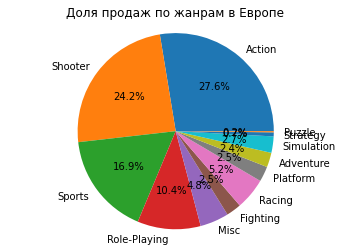

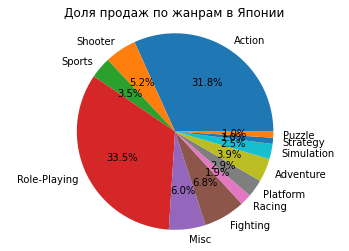

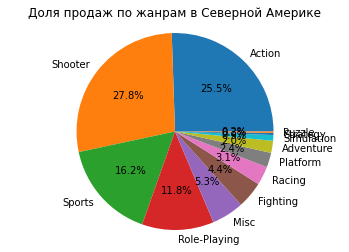

In [62]:
fig1, ax1 = plt.subplots()
ax1.pie(genres_by_region['eu_sales'],labels = genres_by_region['genre'],autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Доля продаж по жанрам в Европе')

fig1, ax1 = plt.subplots()
ax1.pie(genres_by_region['jp_sales'],labels = genres_by_region['genre'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по жанрам в Японии')

fig1, ax1 = plt.subplots()
ax1.pie(genres_by_region['na_sales'],labels = genres_by_region['genre'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по жанрам в Северной Америке')

plt.show()

In [63]:
jp_genres_by_region = data.pivot_table(
    index = 'genre', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

jp_top_genres_by_region = jp_genres_by_region.iloc[:5]

jp_bottom_genres_by_region = pd.DataFrame({'jp_sales': [jp_genres_by_region.iloc[5:]['jp_sales'].sum()]})

jp_top_genres_by_region = jp_top_genres_by_region.append(jp_bottom_genres_by_region)

jp_top_genres_by_region['genre'] = jp_top_genres_by_region['genre'].fillna('Other')
jp_top_genres_by_region

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Role-Playing,28.17,31.16,33.47,101.44
1,Action,74.68,29.58,72.53,199.36
2,Fighting,6.69,6.37,12.43,28.22
3,Misc,12.86,5.61,15.05,37.55
4,Shooter,65.52,4.87,79.02,170.94
0,Other,NaN,15.50,NaN,NaN


In [64]:
eu_genres_by_region = data.pivot_table(
    index = 'genre', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

eu_top_genres_by_region = eu_genres_by_region.iloc[:5]

eu_bottom_genres_by_region = pd.DataFrame({'eu_sales': [eu_genres_by_region.iloc[5:]['eu_sales'].sum()]})

eu_top_genres_by_region = eu_top_genres_by_region.append(eu_bottom_genres_by_region)

eu_top_genres_by_region['genre'] = eu_top_genres_by_region['genre'].fillna('Other')
eu_top_genres_by_region

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Action,74.68,29.58,72.53,199.36
1,Shooter,65.52,4.87,79.02,170.94
2,Sports,45.73,3.26,46.13,109.48
3,Role-Playing,28.17,31.16,33.47,101.44
4,Racing,14.13,1.76,8.74,27.52
0,Other,42.45,NaN,NaN,NaN


In [65]:
na_genres_by_region = data.pivot_table(
    index = 'genre', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()

na_top_genres_by_region = na_genres_by_region.iloc[:5]

na_bottom_genres_by_region = pd.DataFrame({'na_sales': [na_genres_by_region.iloc[5:]['na_sales'].sum()]})

na_top_genres_by_region = na_top_genres_by_region.append(na_bottom_genres_by_region)

na_top_genres_by_region['genre'] = na_top_genres_by_region['genre'].fillna('Other')
na_top_genres_by_region

,genre,eu_sales,jp_sales,na_sales,total_sales
0,Shooter,65.52,4.87,79.02,170.94
1,Action,74.68,29.58,72.53,199.36
2,Sports,45.73,3.26,46.13,109.48
3,Role-Playing,28.17,31.16,33.47,101.44
4,Misc,12.86,5.61,15.05,37.55
0,Other,NaN,NaN,37.86,NaN


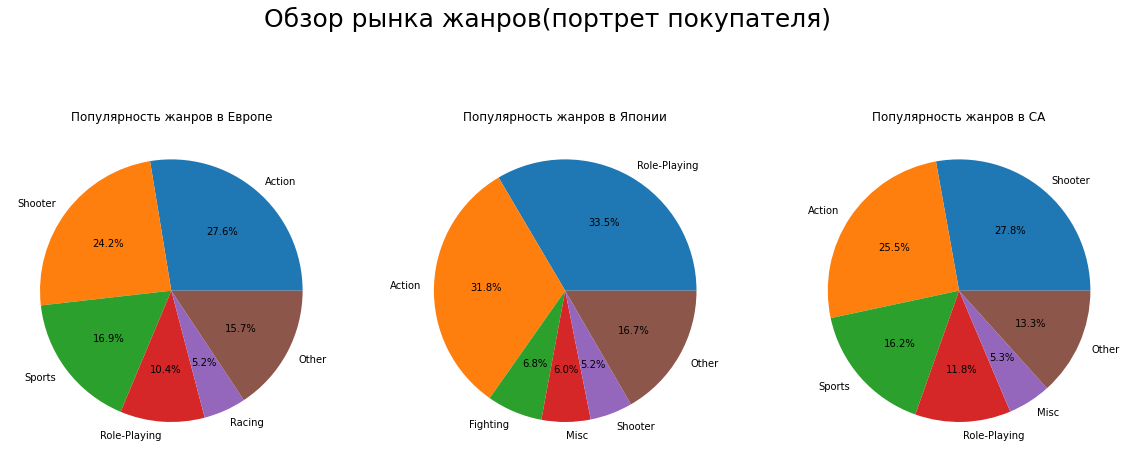

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.pie( eu_top_genres_by_region['eu_sales'],labels = eu_top_genres_by_region['genre'],autopct='%1.1f%%')
fig.set_size_inches(20, 20)

ax2.pie(jp_top_genres_by_region['jp_sales'],labels = jp_top_genres_by_region['genre'],autopct='%1.1f%%')
 

fig.set_size_inches(20, 20)
ax3.pie(na_top_genres_by_region['na_sales'],labels = na_top_genres_by_region['genre'],autopct='%1.1f%%')
 
fig.set_size_inches(20, 20)

ax1.set_title('Популярность жанров в Европе')
ax2.set_title('Популярность жанров в Японии')
ax3.set_title('Популярность жанров в СА')
fig.suptitle('Обзор рынка жанров(портрет покупателя)', fontsize=25, y = 0.7)
plt.show()

Экшн-игры популярны по всех трех регионах ( в Европе - первое место, в СА и Японии - второе). В Америке и Европе также популярны шутеры, спортивные симуляторы и рпг. Пятый жанр отличается ( у Европы - гоночные симуляторы, у Америки - файтинги), при этом разница с менее популярными жанрами уже не так велика. В Японии ситуация кардинально иная: на первом месте рпг, затем - экшн-игры, после чего картина размыта (можно выделить файтинги, шутеры и приключения). Жанр Misc означает игры, не попадающие ни под одну из категорий, во всех трех регионах игры подобного характера занимают порядка 5-6% от всего рынка. Жанры игр, не входящих в ТОП-5, в каждом регионе занимают порядка 13-16% от всего рынка.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для удобства также можно заменить неименования рейтинга ESRB (Entertainment Software Rating Board) на более привычный возрастной ценз. 

In [67]:
data.loc[data['rating'] == 'M', 'rating'] = '17+'

In [68]:
data.loc[data['rating'] == 'E', 'rating'] = '0+'

In [69]:
data.loc[data['rating'] == 'T', 'rating'] = '13+'

In [70]:
data.loc[data['rating'] == 'E10+', 'rating'] = '10+'

In [71]:
rating_by_region = data.pivot_table(
    index = 'rating', 
    values= ['total_sales','na_sales','eu_sales','jp_sales'], 
    aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

rating_by_region

,rating,eu_sales,jp_sales,na_sales,total_sales
0,17+,93.44,8.01,96.42,226.54
1,no rating,58.95,56.90,64.72,198.97
2,0+,58.06,8.94,50.74,133.13
3,13+,34.07,14.78,38.95,99.13
4,10+,26.16,4.46,33.23,71.68


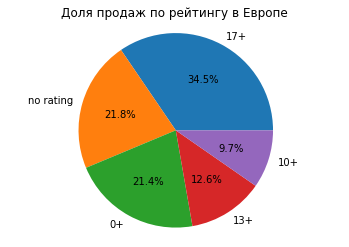

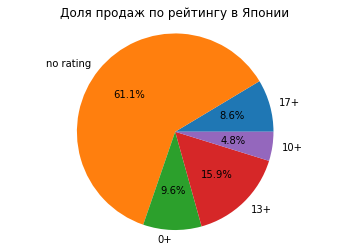

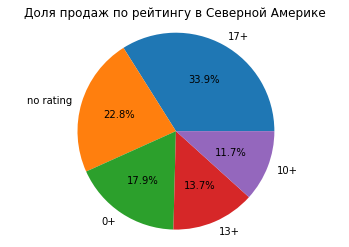

In [72]:
fig1, ax1 = plt.subplots()
ax1.pie(rating_by_region['eu_sales'],labels = rating_by_region['rating'],autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Доля продаж по рейтингу в Европе')

fig1, ax1 = plt.subplots()
ax1.pie(rating_by_region['jp_sales'],labels = rating_by_region['rating'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по рейтингу в Японии')

fig1, ax1 = plt.subplots()
ax1.pie(rating_by_region['na_sales'],labels = rating_by_region['rating'],autopct='%1.1f%%')
ax1.axis('equal')  
plt.title('Доля продаж по рейтингу в Северной Америке')

plt.show()

Практически идентичная ситуация в Европе и Северной Америке, различия между категориями рейтинга минимальна. В Японии подавляющее большинство игр без рейтинга (очевидно, многие игры просто не маркируются ESRB), а игры для пользователей 17+ лишь на третьем месте (в остальных регионах эта группа лидирует). Из рейтинга можно сделать вывод, что в Японии чаще играют в игры люди младшего возраста, в Европе и СА - постарше. 

## Проверить гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- H0 (нулевая гипотеза) - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H1 (альтернативная гипотеза) - Средние пользовательские рейтинги платформ Xbox One и PC различаются;

При проверке гипотез будем использовать t-распределение Стьюдента, поскольку выборки данных у нас небольшие

In [73]:
pc = data.query('platform == "PC" and user_score.isna() == False')['user_score']

In [74]:
xone = data.query('platform == "XOne" and user_score.isna() == False')['user_score']

In [75]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [76]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в2</b></font>
<br /> 
<font size="3", color = "black">
<br />
Интерпретация результата:

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)


In [77]:
pc.mean()

6.298360655737705

In [78]:
xone.mean()

6.594545454545456

Различия между выборками отсутствуют, средние рейтинги платформ похожи

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- H0 (нулевая гипотеза) - Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- H1 (альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action и Sports различаются;

In [79]:
action = data.query('genre == "Action" and user_score.isna() == False')['user_score']

In [80]:
sports = data.query('genre == "Sports" and user_score.isna() == False')['user_score']

In [81]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В случае с жанрами ситуация иная - различия между выборками имеются. 

In [82]:
action.mean()

6.760606060606061

In [83]:
sports.mean()

5.2251968503937

## Общий вывод

### Ознакомились с данными по продаже игр по 2016 г. включительно;

### Провели предобработку данных 
* заменили типы данных в столбцах; 
* обработали пропуски; 
* посчитали суммарные продажи во всех регионах;
* Избавились от дубликата

### Провели исследовательский анализ данных 
* выяснили, что первые игры, информация о которых представлена в датасете, продавались в 1980 г. Рост числа продаж начался в 1994 г., а пик популярности видеоигр пришелся на 2000-е;
* Наиболее популярные платформы принадлежат Sony (PlayStation), Microsoft (Xbox) и Nintendo (Wii). Средняя "продолжительность" одной платформы - порядка 10 лет;
* Актуальный период, начиная с которого можно делать прогнозы на 2017 г. и более поздние периоды - 2014 г. На рынок вышли новые приставки, спрос на них начал снижаться;
* Начиная с 2014 г., самыми популярными платформами были PS4, XBox One и 3DS;
* Отзывы пользователей на продажи видеоигр не влияют, в отличие от оценок критиков - наблюдается корреляция между этими показателями;
* Самыми популярными видеоиграми являются игры в жанре Action, но ппродаются они плохо. Самыми прибыльными являются шутеры, спортивные симуляторы и платформеры. 

### Составили пользовательские портреты
* Рассмотрели игроков из трех регионов (Северная Америка, Европа и Япония). Европейцы и американцы в среднем имеют схожие вкусы, в Японии рынок в сфере видеоигр отличается;
* Самыми популярными с 2014 г. платформами в Европе и Америке являются PS4. В Японии предпочитают портативные консоли 3DS;
* Во всех трех регионах популярны Action-игры, затем, в Европе и Америке идут шутеры, в то время как в Японии - рпг (в шутеры практически не играют). В западных странах также предпочитают спортивные симуляторы, в Японии явного лидера на третье место нет;
* В Америке и Европе явно играют более старшие игроки, которые предпочитают игры 17+. В Японии основная возрастная категория - 13+ (при этом доминируют игры без рейтинга, что может искажать действительность).

### Проверили гипотезы

* С помощью t-распределения Стьюдента сравнили средние пользовательские оценки у игр на PC и XBox One - гипотеза о том, что рейтинги одинаковые, не была отвергнута. 
* При сравнении средних пользовательских рейтингов жанра Action и Sports картина была иная - гипотеза о том, что средние рейтинги одинаковые, была опровергнута. У Action игр средняя оценка гораздо выше. 



## Бонус

In [84]:
data_games = pd.read_csv('/datasets/games.csv')

In [85]:
data_games.columns = map(str.lower, data_games.columns)

In [86]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [87]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [88]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [89]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [90]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

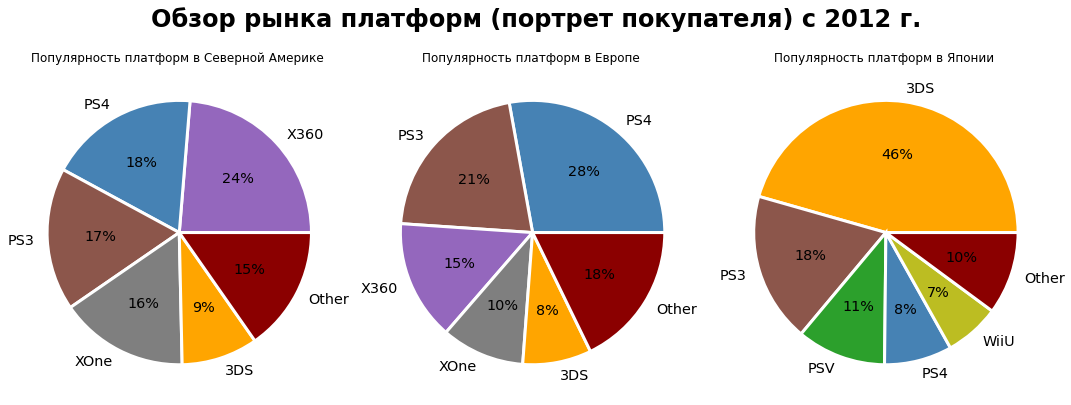

In [91]:
# check
# круги в ряд

x_year = 2012

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

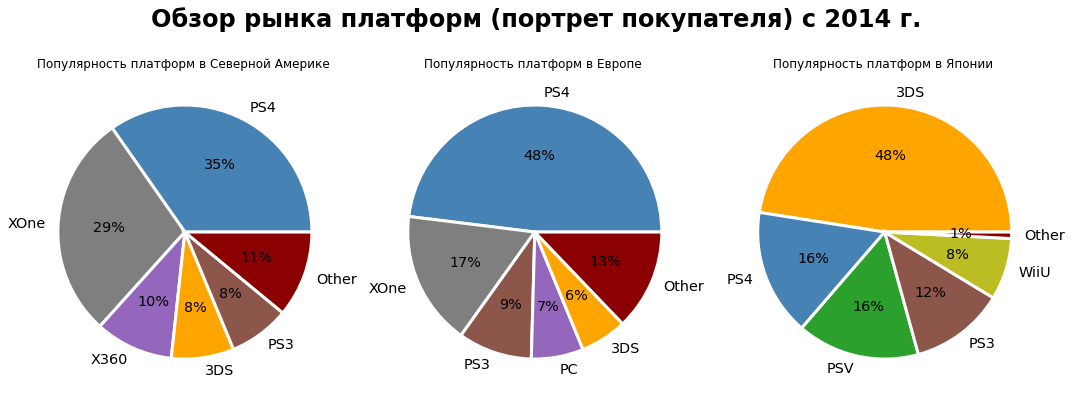

In [92]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

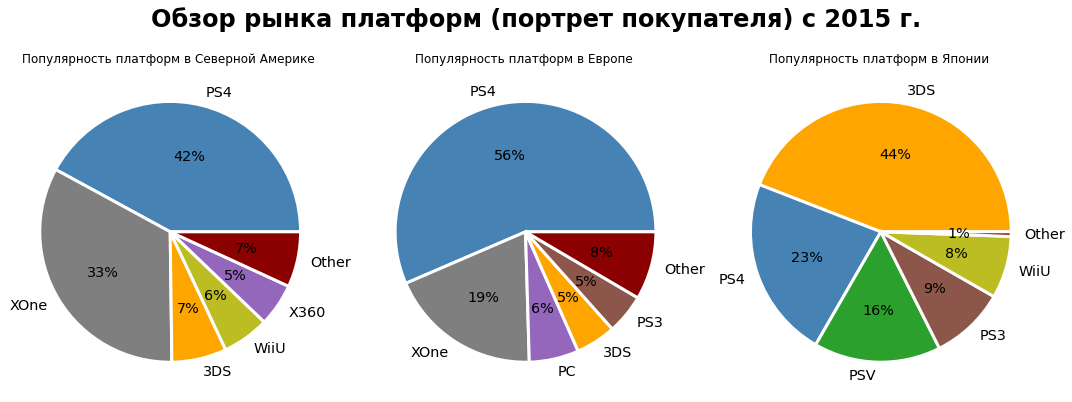

In [93]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])